#helper functions!

num_of_tests = 10


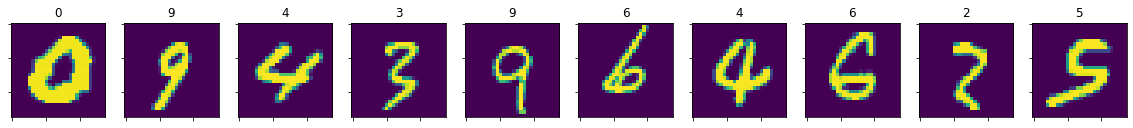

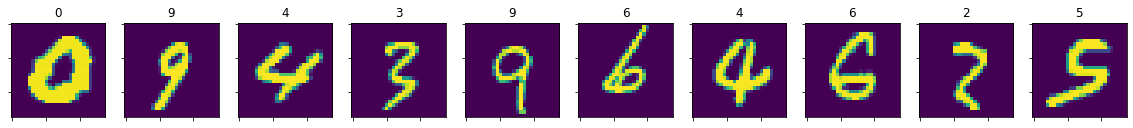

In [3]:
from torchvision.transforms import transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from torchvision import datasets
import  torch

def show_images_return_from_testing(count_of_images):
    testset = datasets.MNIST(root='data/testset', transform=transforms.ToTensor(), download=True)
    testsetloader = torch.utils.data.DataLoader(testset, batch_size=count_of_images, shuffle=True)  #TODO shuffle for
    testing_images, labels = next(iter(testsetloader))
    if count_of_images == 1: num_of_tests = 2
    num_of_tests = testing_images.__len__()
    # fig, axs = plt.subplots(1, num_of_tests,sharey='all')
    size_fig = 15
    num_plots = count_of_images
    if count_of_images == 1: num_plots = 2
    if count_of_images <= 8: size_fig = 150 / count_of_images
    if count_of_images <= 3: size_fig = 5
    if count_of_images > 8: size_fig = 200 / count_of_images
    if count_of_images > 15: size_fig = 300 / count_of_images
    fig, axs = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    fig2, axs2 = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    print(f'{num_of_tests = }')

    for indx in range(num_of_tests):
        axs[indx].set_yticklabels([])  # x-axis
        axs[indx].set_xticklabels([])  # y-axis
        axs[indx].imshow(testing_images[indx, 0, :, :])
        axs[indx].set_title(int(labels[indx]))

    for indx in range(num_of_tests):
        axs2[indx].set_yticklabels([])  # x-axis
        axs2[indx].set_xticklabels([])  # y-axis
        axs2[indx].imshow(testing_images[indx, 0, :, :])
        axs2[indx].set_title(int(labels[indx]))
    return testing_images, labels


# testing_images, labels = show_images_from_testing(10)
_, _ = show_images_return_from_testing(10)


num_of_tests = 10
torch.Size([10, 10])
tensor([[-11.6871, -13.5055,   5.1817,  27.8361, -28.5105,  13.3065, -17.6035,
          -1.0232,  14.0309,   8.0188],
        [-10.7751,  -9.8905,  -2.3787,  15.5125, -11.2836,   8.0714, -27.1354,
           9.6486,   4.8690,  16.1583],
        [ -7.4492,  -8.0117,  -5.5535,   1.0132,   2.0978,  -1.6362, -22.2419,
           6.7024,   7.0474,  18.6121],
        [ 22.2120,  -8.5072,   4.4675,   3.2916, -22.2083,   5.4246,   3.9988,
          -7.9468,   6.5290,   5.7247],
        [  6.4683,  -1.1485,  19.7322,   0.4399,  -0.2360,  -6.0053,  -6.4140,
          -1.2604,  -0.3127,  -7.3466],
        [ -5.8644,   4.4010,   0.1688,   5.9658,  -5.3660,  -3.2250, -20.5320,
          15.8533,  -3.4964,   7.8783],
        [ -2.7804,   3.5201,   2.8922,   9.3871,  -7.9293,   3.7238, -28.8828,
          17.5919,  -6.3987,   6.9072],
        [ -6.0012,  -2.4238,   1.3511,   0.8125,   0.7160,  -3.7751, -20.2276,
          14.2213,   2.6439,   6.8606],
        [

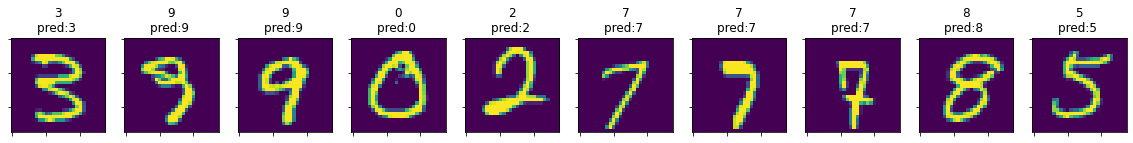

In [45]:
from torchvision.transforms import transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from torchvision import datasets
import torch
from VAE import AE2
from VAE import AE
from model import MyModel5

# PATH_VAE = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/weights_training'
#
# model_vae = AE()
# model_vae.load_state_dict(torch.load(PATH_VAE))
# model_vae.eval()

PATH_weight_classify = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/weights_model_classifier'
model_classify = MyModel5()
model_classify.load_state_dict(torch.load(PATH_weight_classify))
model_classify.eval()

def show_images_with_model(count_of_images=5, model=model_classify):
    model.eval()
    testset = datasets.MNIST(root='data/testset', transform=transforms.ToTensor(), download=True)
    testsetloader = torch.utils.data.DataLoader(testset, batch_size=count_of_images, shuffle=True)  #TODO shuffle for
    testing_images, labels = next(iter(testsetloader))
    if count_of_images == 1: num_of_tests = 2
    num_of_tests = testing_images.__len__()
    # fig, axs = plt.subplots(1, num_of_tests,sharey='all')
    size_fig = 15
    num_plots = count_of_images
    if count_of_images == 1: num_plots = 2
    if count_of_images <= 8: size_fig = 150 / count_of_images
    if count_of_images <= 3: size_fig = 5
    if count_of_images > 8: size_fig = 200 / count_of_images
    if count_of_images > 15: size_fig = 300 / count_of_images
    fig, axs = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    # fig2, axs2 = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    print(f'{num_of_tests = }')
    PRED_bool = True
    if PRED_bool :
            pred = model(testing_images)
            print(pred.shape)
            print(pred)
    for indx in range(num_of_tests):
        title = str(int(labels[indx]))+'\npred:'
        if PRED_bool :
            pred_acc = pred[indx]
            pred_nr = int(pred_acc.argmax())
            acc = pred_acc[pred_nr]
            title += str(pred_nr) +' '
            # title += str(int(acc)) # TODO add later as accuracy

        axs[indx].set_yticklabels([])  # x-axis
        axs[indx].set_xticklabels([])  # y-axis
        axs[indx].imshow(testing_images[indx, 0, :, :])
        axs[indx].set_title(title)
        # axs[indx].set_title(int(labels[indx]))

    # for indx in range(num_of_tests):
    #     axs2[indx].set_yticklabels([])  # x-axis
    #     axs2[indx].set_xticklabels([])  # y-axis
    #     pred = model(testing_images[indx, 0, :, :])
    #     axs2[indx].imshow(pred)
    #     # axs2[indx].imshow(testing_images[indx, 0, :, :])
    #     axs2[indx].set_title(int(labels[indx]))
    return testing_images, labels


# testing_images, labels = show_images_return_from_testing(10)
# _, _ = show_images_return_from_testing(10)
_, _ = show_images_with_model(10)


Programm

num_of_tests = 10
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.000

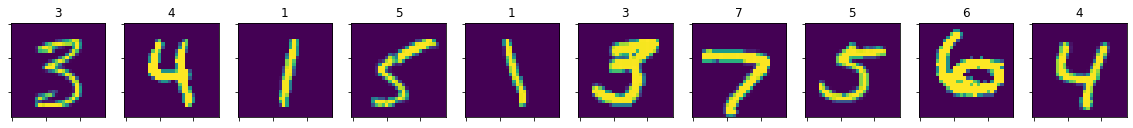

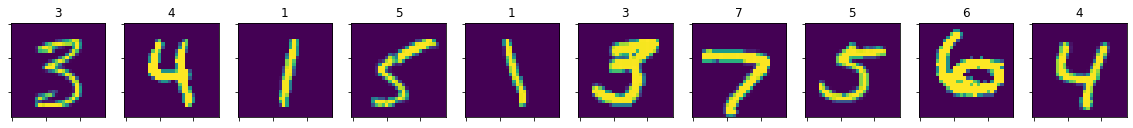

In [5]:
import torch
from VAE import VAE
from VAE import AE_relu
# from VAE import VAE

PATH_VAE = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/weights_training'

model_vae = AE_relu()
model_vae.load_state_dict(torch.load(PATH_VAE))
model_vae.eval()
testing_images, labels = show_images_return_from_testing(10)
print(testing_images[0])
testing_images = testing_images /255
#TODO Preproccesing for images needed !!!
print(testing_images[0])
enc = model_vae.encoder(testing_images[0])
dec = model_vae.decoder(enc)
print(f'{enc.shape= }')
print(f'{enc = }')
print(f'{dec.shape  = }')
print(f'{dec  = }')

num_of_tests = 10


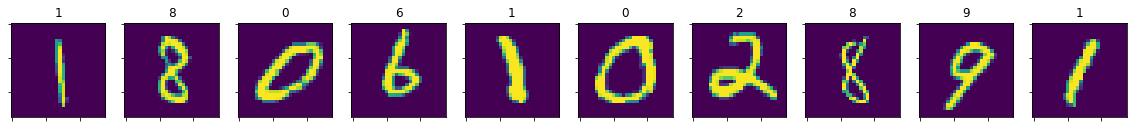

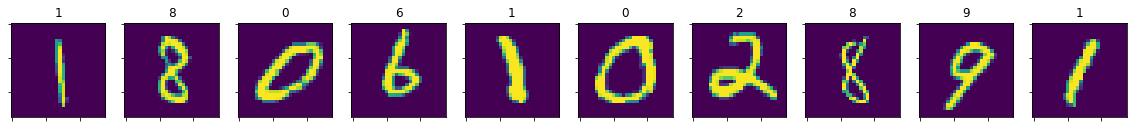

In [282]:
# show_images_return_from_testing
testing_images, labels = show_images_return_from_testing(10)

x = model_vae(testing_images[0])